In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import ecopy as ep

In [2]:
df = pd.read_csv("/home/anna/ib/muzak/music_project/temp_data.csv", sep=";")

In [3]:
df.head()

,track_name,mean_energy,ZCR_mean,ZCR_std,spectral_flatness_mean,spectral_flatness_std,spectral_centroids_mean,spectral_centroids_std,spectral_bandwidths_mean,spectral_bandwidths_std,...,MFCC_11,MFCC_12,MFCC_13,MFCC_14,MFCC_15,MFCC_16,MFCC_17,MFCC_18,MFCC_19,MFCC_20
0,Ля_мажор_Моцарт,0.074795,6.076484,1.924883,0.000898,0.028055,0.081112,0.047392,980.226382,219.287091,...,-5.456479,-1.657482,4.654854,2.549605,-2.875899,-5.556747,-6.628302,-5.568473,-7.677846,-3.557798
1,elton_dzhon_blue_sorry_seems_to_be_the_hardest...,0.063699,8.033155,8.148735,0.036727,0.142872,0.279419,0.142315,2345.904312,752.239010,...,-4.191245,-0.330279,-3.164508,-0.349007,-2.200420,1.859461,-3.017477,1.208904,-1.755575,0.599529
2,Robin_Schulz__Sugar_feat._Francesco_Yates,0.033307,9.047992,8.842200,0.023759,0.051523,0.345913,0.172666,2423.612235,677.313737,...,-8.480961,2.376980,-3.935984,3.141425,-5.844786,-1.721986,-5.057473,-2.744251,-5.777932,0.529334
3,model_dlya_sborki_shekli_robert_cherez_picshev...,0.018343,5.795604,5.816792,0.004302,0.011707,0.265293,0.123201,2070.454139,581.760506,...,-15.051490,12.396855,-8.422931,7.008120,-9.678147,8.766813,-1.844657,-2.135070,1.010293,-1.549394
4,Arabian_Nights_2019_Will_Smith,0.014201,7.803405,6.767272,0.040347,0.158868,0.321032,0.129102,2168.309029,532.571878,...,-0.425563,0.220803,-2.546136,2.657563,-4.018467,2.669500,-4.003585,1.422317,-2.827890,-0.375510


In [14]:
x = df.iloc[1:, 1:].values    # features
x = StandardScaler().fit_transform(x)    # standartisation

pca = PCA(n_components=2)       # PCA
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [6]:
principalDf['names'] = df.track_name  # add names

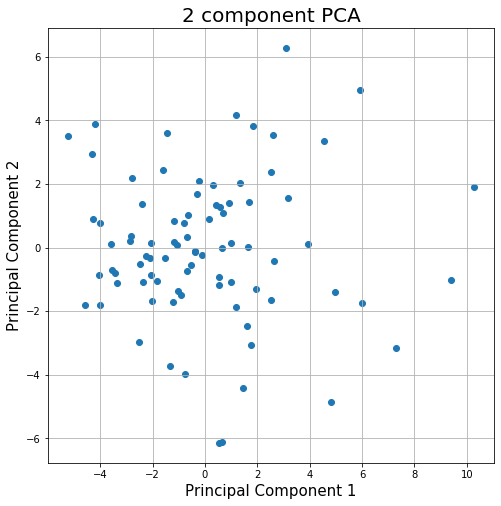

In [7]:
fig = plt.figure(figsize = (8,8)) # plot
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(principalDf.loc[:, 'principal component 1']
               , principalDf.loc[:, 'principal component 2'])
ax.grid()

In [9]:
principalDf.to_csv("/home/anna/ib/muzak/principle.csv") # Table with coordinates to work with

In [3]:
# AND NOW... NMDS
import ecopy as ep

nmds_df = df.iloc[1:, 1:].values**2 # Does not work with negative numbers
nmds_df_T = ep.transform(nmds_df, 'wisconsin')
nmds_df_D = ep.distance(nmds_df_T, 'bray')
musicMDS = ep.MDS(nmds_df_D, transform='monotone')

/usr/local/lib/python3.6/dist-packages/ecopy/ordination/pcoa.py:138: RuntimeWarning: invalid value encountered in sqrt
  self.U = np.round(self.U.dot(np.diag(np.sqrt(self.evals))), 4)


Finished at iteration 2. Stress = 0.25585132299193775
Finished at iteration 36. Stress = 0.2382585340681453
Finished at iteration 39. Stress = 0.29717017868946005
Finished at iteration 9. Stress = 0.4104250005917725
Finished at iteration 43. Stress = 0.3199785931626907
Finished at iteration 9. Stress = 0.410428023252049
Finished at iteration 38. Stress = 0.3070845235787698
Finished at iteration 87. Stress = 0.25092815388487943
Finished at iteration 50. Stress = 0.2438351871108785
Finished at iteration 56. Stress = 0.2274530011349215
Finished at iteration 9. Stress = 0.4101121087048936
Finished at iteration 31. Stress = 0.28498142414016403
Finished at iteration 25. Stress = 0.2577756585176116
Finished at iteration 10. Stress = 0.41056416772436566
Finished at iteration 48. Stress = 0.29265301344465716
Finished at iteration 25. Stress = 0.3266940855697561
Finished at iteration 47. Stress = 0.2435061419711017
Finished at iteration 35. Stress = 0.25876481918595157
Finished at iteration 23. 

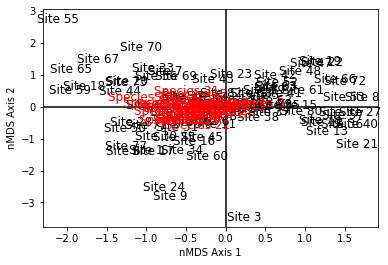

In [5]:
musicMDS.biplot(descriptors=nmds_df_T)

Finished at iteration 2. Stress = 0.17435077341931207
Finished at iteration 60. Stress = 0.1987358532258311
Finished at iteration 10. Stress = 0.4099375992417927
Finished at iteration 16. Stress = 0.3765155441899374
Finished at iteration 24. Stress = 0.20562068001137773
Finished at iteration 62. Stress = 0.21923483634720584
Finished at iteration 24. Stress = 0.37488718334467297
Finished at iteration 34. Stress = 0.25504478799568847
Finished at iteration 20. Stress = 0.3452905554949274
Finished at iteration 8. Stress = 0.410767252902177
Finished at iteration 21. Stress = 0.23085037873426564
Finished at iteration 9. Stress = 0.4103872497472185
Finished at iteration 35. Stress = 0.28366516560028726
Finished at iteration 10. Stress = 0.4101949100791253
Finished at iteration 21. Stress = 0.30609262713732044
Finished at iteration 43. Stress = 0.19727604839815713
Finished at iteration 20. Stress = 0.3457530344021934
Finished at iteration 50. Stress = 0.20073170243483876
Finished at iteration 

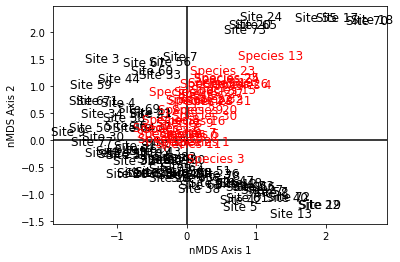

In [6]:
nmds_df = df.iloc[1:, 1:].values**2  # Variant without transformation
nmds_df_D = ep.distance(nmds_df, 'bray')
musicMDS = ep.MDS(nmds_df_D, transform='monotone')
musicMDS.biplot(descriptors=nmds_df_T)

Finished at iteration 9. Stress = 0.02909108567288699
Finished at iteration 75. Stress = 0.06659761082102515
Finished at iteration 60. Stress = 0.02909807549452746
Finished at iteration 55. Stress = 0.09953059145619499
Finished at iteration 114. Stress = 0.04490110364075723
Finished at iteration 102. Stress = 0.029337588180467788
Finished at iteration 98. Stress = 0.02911942219214289
Finished at iteration 44. Stress = 0.1073883491849863
Finished at iteration 43. Stress = 0.10434570078198341
Finished at iteration 87. Stress = 0.0644780813545719
Finished at iteration 85. Stress = 0.0458649883402673
Finished at iteration 94. Stress = 0.055023326302914566
Finished at iteration 71. Stress = 0.0818785092518272
Finished at iteration 138. Stress = 0.040791968401672755
Finished at iteration 58. Stress = 0.06809880288990684
Finished at iteration 44. Stress = 0.04134434741327211
Finished at iteration 57. Stress = 0.029678682272334177
Finished at iteration 71. Stress = 0.06195752340085784
Finished

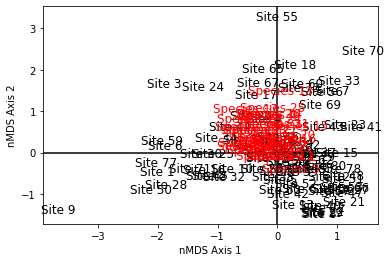

In [7]:
nmds_df = df.iloc[1:, 1:].values**2 # now with other distances, I hope
nmds_df_D = ep.distance(nmds_df_T, 'bray')
musicMDS = ep.MDS(nmds_df_D, transform='absolute')
musicMDS.biplot(descriptors=nmds_df_T)

Finished at iteration 2. Stress = 0.17435077341931207
Finished at iteration 28. Stress = 0.2856948350422577
Finished at iteration 40. Stress = 0.2403509365718435
Finished at iteration 33. Stress = 0.22344376619543152
Finished at iteration 27. Stress = 0.31863331831854014
Finished at iteration 44. Stress = 0.2125958162464737
Finished at iteration 39. Stress = 0.22193413102850523
Finished at iteration 31. Stress = 0.22902093046398914
Finished at iteration 8. Stress = 0.41019453208133094
Finished at iteration 35. Stress = 0.24073636033777746
Finished at iteration 28. Stress = 0.30810813438988105
Finished at iteration 37. Stress = 0.23542775535543162
Finished at iteration 9. Stress = 0.4106215140655966
Finished at iteration 39. Stress = 0.32821275215214346
Finished at iteration 39. Stress = 0.213469391069984
Finished at iteration 23. Stress = 0.35550131426165577
Finished at iteration 46. Stress = 0.30050553818408215
Finished at iteration 9. Stress = 0.4098694792588967
Finished at iteration

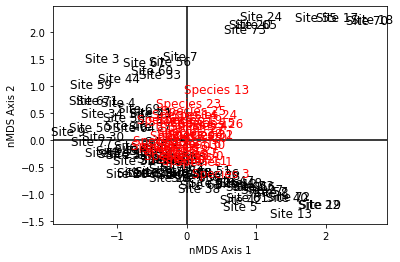

In [5]:

nmds_df = df.iloc[1:, 1:].values**2
nmds_df_D = ep.distance(nmds_df, 'bray')
musicMDS = ep.MDS(nmds_df_D)
musicMDS.biplot(descriptors=nmds_df)

Finished at iteration 2. Stress = 0.2447632369027977
Finished at iteration 33. Stress = 0.31408608923441966
Finished at iteration 41. Stress = 0.2759639325914126
Finished at iteration 11. Stress = 0.4099918861006964
Finished at iteration 8. Stress = 0.41059623885448715
Finished at iteration 58. Stress = 0.2526626041773338
Finished at iteration 9. Stress = 0.4100764924611865
Finished at iteration 76. Stress = 0.22870100464415272
Finished at iteration 41. Stress = 0.27414806467710645
Finished at iteration 26. Stress = 0.2606356326383509
Finished at iteration 9. Stress = 0.4100263811291806
Finished at iteration 36. Stress = 0.24993101702333786
Finished at iteration 49. Stress = 0.2643264520031008
Finished at iteration 9. Stress = 0.41041606137283615
Finished at iteration 38. Stress = 0.30266566327685296
Finished at iteration 67. Stress = 0.1984885930592589
Finished at iteration 10. Stress = 0.41025221010248764
Finished at iteration 63. Stress = 0.2893969816910187
Finished at iteration 31.

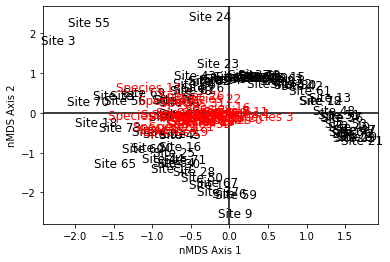

In [9]:
nmds_df = df.iloc[1:, 1:].values**2 # With euclidean distances
nmds_df_D = ep.distance(nmds_df_T, 'euclidean')
musicMDS = ep.MDS(nmds_df_D, transform='monotone')
musicMDS.biplot(descriptors=nmds_df_T)

Finished at iteration 2. Stress = 0.003898850522711714
Finished at iteration 89. Stress = 0.0043983751197861415
Finished at iteration 60. Stress = 0.02757553338537241
Finished at iteration 151. Stress = 0.016463020771959273
Finished at iteration 71. Stress = 0.004346198271185297
Finished at iteration 107. Stress = 0.0356977851532329
Finished at iteration 56. Stress = 0.02770475113677583
Finished at iteration 72. Stress = 0.0045057369410823585
Finished at iteration 69. Stress = 0.060154301049969834
Finished at iteration 50. Stress = 0.07773189339500232
Finished at iteration 96. Stress = 0.02734796071543222
Finished at iteration 60. Stress = 0.08627759099369932
Finished at iteration 80. Stress = 0.08152943194130756
Finished at iteration 105. Stress = 0.004392930512457247
Finished at iteration 60. Stress = 0.08646339310159534
Finished at iteration 99. Stress = 0.03566370494717072
Finished at iteration 80. Stress = 0.05686875935129883
Finished at iteration 133. Stress = 0.00427770508693347

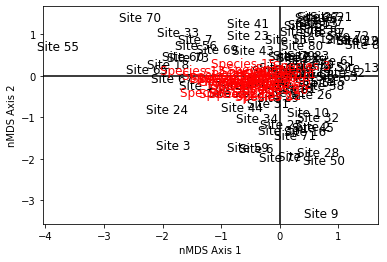

In [5]:
nmds_df = df.iloc[1:, 1:].values**2
nmds_df_T = ep.transform(nmds_df, 'wisconsin')
nmds_df_D = ep.distance(nmds_df_T, 'euclidean')
musicMDS = ep.MDS(nmds_df_D, transform='absolute')
musicMDS.biplot(descriptors=nmds_df_T)

Finished at iteration 22. Stress = 0.22058847423457903
Finished at iteration 127. Stress = 0.23329410660598018
Finished at iteration 150. Stress = 0.23800427305952956
Finished at iteration 114. Stress = 0.2249883133032888
Finished at iteration 131. Stress = 0.26392586779106736
Finished at iteration 101. Stress = 0.2540140686285979
Finished at iteration 108. Stress = 0.22306729334353056
Finished at iteration 141. Stress = 0.22307771069830365
Finished at iteration 264. Stress = 0.24953853564596945
Finished at iteration 152. Stress = 0.22320255104832012
Finished at iteration 133. Stress = 0.22749969277017643
Finished at iteration 115. Stress = 0.23308255552807863
Finished at iteration 157. Stress = 0.2412833012205058
Finished at iteration 146. Stress = 0.2345149665628583
Finished at iteration 55. Stress = 0.2890342903174107
Finished at iteration 106. Stress = 0.23795158795630067
Finished at iteration 133. Stress = 0.23019998147460494
Finished at iteration 218. Stress = 0.22883341724920178

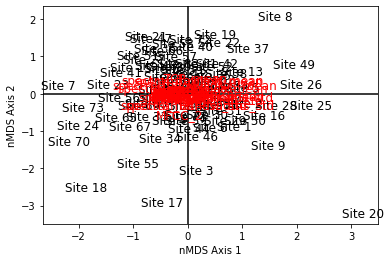

In [10]:
nmds_df = df.iloc[1:, 1:] - df.iloc[1:, 1:].min() # Now without squaring
nmds_df_T = ep.transform(nmds_df, 'wisconsin')
nmds_df_D = ep.distance(nmds_df_T, 'euclidean')
musicMDS = ep.MDS(nmds_df_D, transform='absolute')
musicMDS.biplot(descriptors=nmds_df_T)

Finished at iteration 22. Stress = 0.22058847423457903
Finished at iteration 137. Stress = 0.2272272552945621
Finished at iteration 118. Stress = 0.2633902344471039
Finished at iteration 134. Stress = 0.24822836114356617
Finished at iteration 175. Stress = 0.23227819917800424
Finished at iteration 214. Stress = 0.22566360941664756
Finished at iteration 176. Stress = 0.2312441136817266
Finished at iteration 113. Stress = 0.24546972090753827
Finished at iteration 194. Stress = 0.23575452685675638
Finished at iteration 173. Stress = 0.2248071858954693
Finished at iteration 110. Stress = 0.27596157095362006
Finished at iteration 75. Stress = 0.22583851298448523
Finished at iteration 146. Stress = 0.22658012669801111
Finished at iteration 131. Stress = 0.25225630660419796
Finished at iteration 113. Stress = 0.22350414728270537
Finished at iteration 121. Stress = 0.23895539013445163
Finished at iteration 80. Stress = 0.2636240610397777
Finished at iteration 159. Stress = 0.22817722292325093


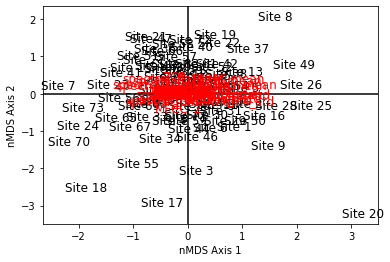

In [11]:
nmds_df = df.iloc[1:, 1:] - df.iloc[1:, 1:].min()
dunes_D = ep.distance(nmds_df, 'euclidean')
musicsMDS = ep.MDS(nmds_df_D, transform='absolute')
musicMDS.biplot(descriptors=nmds_df)

Finished at iteration 26. Stress = 0.13584249422533065
Finished at iteration 11. Stress = 0.32009755137744816
Finished at iteration 26. Stress = 0.28785460729896645
Finished at iteration 13. Stress = 0.3150375831203003
Finished at iteration 111. Stress = 0.13801386310010316
Finished at iteration 24. Stress = 0.2778388678344937
Finished at iteration 13. Stress = 0.36262161202759713
Finished at iteration 33. Stress = 0.23753452430162195
Finished at iteration 58. Stress = 0.199790177195789
Finished at iteration 59. Stress = 0.20311621147509862
Finished at iteration 17. Stress = 0.28551678089892346
Finished at iteration 51. Stress = 0.18787072167226268
Finished at iteration 22. Stress = 0.261999328669065
Finished at iteration 20. Stress = 0.28372521830045805
Finished at iteration 19. Stress = 0.2996729226204716
Finished at iteration 60. Stress = 0.22194430783231267
Finished at iteration 82. Stress = 0.1391640587606209
Finished at iteration 57. Stress = 0.2047809099927502
Finished at iterat

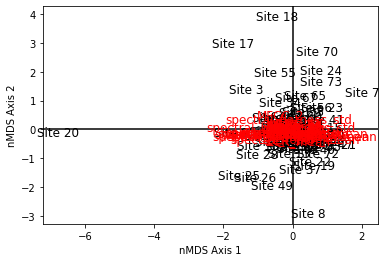

In [9]:
nmds_df = df.iloc[1:, 1:] - df.iloc[1:, 1:].min()
nmds_df_T = ep.transform(nmds_df, 'wisconsin')
nmds_df_D = ep.distance(nmds_df_T, 'euclidean')
musicsMDS = ep.MDS(nmds_df_D, transform='monotone')
musicsMDS.biplot(descriptors=nmds_df_T)

Finished at iteration 26. Stress = 0.13584249422533065
Finished at iteration 22. Stress = 0.2793392857235371
Finished at iteration 31. Stress = 0.28883191940692965
Finished at iteration 55. Stress = 0.20149438029580707
Finished at iteration 35. Stress = 0.26217708629212993
Finished at iteration 33. Stress = 0.24311768816761692
Finished at iteration 56. Stress = 0.24700636229638384
Finished at iteration 18. Stress = 0.27232168460839434
Finished at iteration 43. Stress = 0.18294537476698747
Finished at iteration 74. Stress = 0.17523659277703482
Finished at iteration 25. Stress = 0.24626000392474262
Finished at iteration 33. Stress = 0.28888283844547225
Finished at iteration 101. Stress = 0.1474996120815611
Finished at iteration 18. Stress = 0.28874468469351056
Finished at iteration 24. Stress = 0.2845016986596078
Finished at iteration 61. Stress = 0.21518185596366587
Finished at iteration 16. Stress = 0.33735878548059245
Finished at iteration 26. Stress = 0.2925802046796541
Finished at i

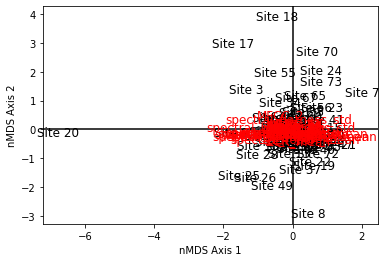

In [12]:
nmds_df = df.iloc[1:, 1:] - df.iloc[1:, 1:].min()
nmds_df_D = ep.distance(nmds_df_T, 'euclidean')
musicsMDS = ep.MDS(nmds_df_D, transform='monotone')
musicsMDS.biplot(descriptors=nmds_df_T)

Finished at iteration 24. Stress = 0.1425401852519962
Finished at iteration 45. Stress = 0.20897646625026453
Finished at iteration 59. Stress = 0.20366036802574541
Finished at iteration 62. Stress = 0.16030097208850697
Finished at iteration 24. Stress = 0.3102583212339275
Finished at iteration 9. Stress = 0.4107001542713343
Finished at iteration 22. Stress = 0.29422582224688687
Finished at iteration 14. Stress = 0.31433977341487823
Finished at iteration 28. Stress = 0.2733775435855433
Finished at iteration 12. Stress = 0.3849110220464144
Finished at iteration 30. Stress = 0.2547369627878036
Finished at iteration 91. Stress = 0.15158789281001567
Finished at iteration 19. Stress = 0.2996907313488732
Finished at iteration 20. Stress = 0.2924558375656602
Finished at iteration 21. Stress = 0.28915489213643475
Finished at iteration 84. Stress = 0.1630064650819169
Finished at iteration 108. Stress = 0.1589316900647147
Finished at iteration 102. Stress = 0.14938806220248485
Finished at iterati

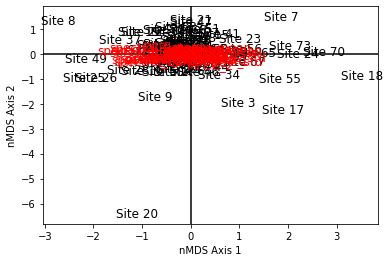

In [13]:
nmds_df = df.iloc[1:, 1:] - df.iloc[1:, 1:].min()
nmds_df_T = ep.transform(nmds_df, 'wisconsin')
nmds_df_D = ep.distance(nmds_df_T, 'bray')
musicMDS = ep.MDS(nmds_df_D, transform='monotone')
musicMDS.biplot(descriptors=nmds_df_T)

Finished at iteration 2. Stress = 0.17053599698846061
Finished at iteration 54. Stress = 0.1457095710382958
Finished at iteration 29. Stress = 0.2914424226249333
Finished at iteration 69. Stress = 0.13010777975623902
Finished at iteration 32. Stress = 0.24096750001978293
Finished at iteration 23. Stress = 0.19102076131466553
Finished at iteration 47. Stress = 0.17158047931383819
Finished at iteration 27. Stress = 0.20793634426342306
Finished at iteration 25. Stress = 0.24309995959076805
Finished at iteration 8. Stress = 0.4107302919266818
Finished at iteration 17. Stress = 0.3222642850892374
Finished at iteration 22. Stress = 0.2612795858191722
Finished at iteration 31. Stress = 0.193480997921687
Finished at iteration 9. Stress = 0.4106246330998452
Finished at iteration 9. Stress = 0.41053854819515
Finished at iteration 29. Stress = 0.18561461993436745
Finished at iteration 38. Stress = 0.2013539129104639
Finished at iteration 48. Stress = 0.17480824140118265
Finished at iteration 49. 

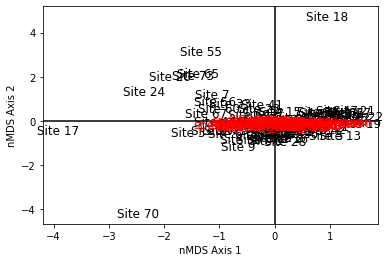

In [14]:
nmds_df = df.iloc[1:, 1:] - df.iloc[1:, 1:].min()
nmds_df_D = ep.distance(nmds_df, 'bray')
musicMDS = ep.MDS(nmds_df_D, transform='monotone')
musicMDS.biplot(descriptors=nmds_df)

Finished at iteration 28. Stress = 0.07566423895511923
Finished at iteration 82. Stress = 0.07749619094513424
Finished at iteration 107. Stress = 0.07785590750285645
Finished at iteration 61. Stress = 0.0913574228170991
Finished at iteration 102. Stress = 0.08940134828878529
Finished at iteration 142. Stress = 0.08851215358537053
Finished at iteration 71. Stress = 0.08760041066887955
Finished at iteration 98. Stress = 0.08622066789074831
Finished at iteration 171. Stress = 0.08994944322676407
Finished at iteration 88. Stress = 0.08630061263810937
Finished at iteration 120. Stress = 0.08823448579535402
Finished at iteration 82. Stress = 0.08021642287022127
Finished at iteration 116. Stress = 0.08032208312969667
Finished at iteration 86. Stress = 0.08473144448353842
Finished at iteration 121. Stress = 0.10620526113065487
Finished at iteration 138. Stress = 0.08470378976429362
Finished at iteration 79. Stress = 0.07751954891912716
Finished at iteration 86. Stress = 0.07625503217461513
Fin

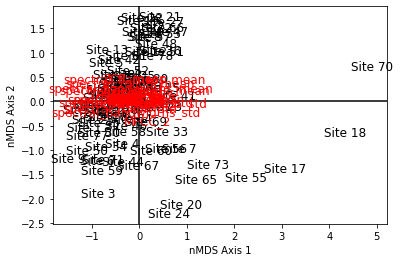

In [18]:
nmds_df = df.iloc[1:, 1:] - df.iloc[1:, 1:].min()
nmds_df_D = ep.distance(nmds_df, 'bray')
musicMDS = ep.MDS(nmds_df_D, transform='absolute')
musicMDS.biplot(descriptors=nmds_df)

Finished at iteration 21. Stress = 0.21446802598646705
Finished at iteration 125. Stress = 0.21892012142208475
Finished at iteration 232. Stress = 0.2323842389315862
Finished at iteration 202. Stress = 0.2194782004613609
Finished at iteration 166. Stress = 0.22716003193729664
Finished at iteration 77. Stress = 0.2328871433758704
Finished at iteration 124. Stress = 0.22162938639226062
Finished at iteration 121. Stress = 0.22288868948055657
Finished at iteration 65. Stress = 0.27830758917943815
Finished at iteration 135. Stress = 0.23032947559423247
Finished at iteration 126. Stress = 0.21993908062372938
Finished at iteration 164. Stress = 0.2221932529815005
Finished at iteration 123. Stress = 0.23454176447858857
Finished at iteration 75. Stress = 0.2289310157920172
Finished at iteration 195. Stress = 0.21865611848401562
Finished at iteration 92. Stress = 0.23607816208482216
Finished at iteration 127. Stress = 0.264965209190267
Finished at iteration 106. Stress = 0.24401877291124058
Fini

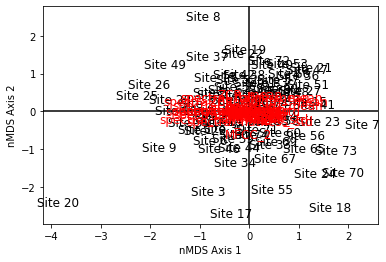

In [17]:
nmds_df = df.iloc[1:, 1:] - df.iloc[1:, 1:].min()
nmds_df_T = ep.transform(nmds_df, 'wisconsin')
nmds_df_D = ep.distance(nmds_df_T, 'bray')
musicMDS = ep.MDS(nmds_df_D, transform='absolute')
musicMDS.biplot(descriptors=nmds_df_T)

In [19]:
musicMDS.scores # We can extract coordinates

array([[-1.16715819, -0.53351675],
       [-0.9498763 , -0.06347752],
       [-0.85826125, -1.89860929],
       [-0.35240508, -0.86078242],
       [-0.70885564,  0.78694586],
       [-0.88638013, -1.22348517],
       [ 0.82915754, -0.96957651],
       [ 0.09324051,  1.33654754],
       [-1.50835185, -1.17704958],
       [-0.7083501 , -0.30312116],
       [-0.62414033,  0.134953  ],
       [ 0.15004823,  1.02286705],
       [-0.68594118,  1.06280346],
       [-0.39887056,  0.36661811],
       [ 0.41688634,  0.28329486],
       [-0.97926588, -0.06125857],
       [ 3.05740879, -1.37451149],
       [ 4.34063588, -0.64498371],
       [-0.03758328,  1.64727947],
       [ 0.88346022, -2.12197771],
       [ 0.44298771,  1.74690944],
       [ 0.05108313,  1.71024864],
       [ 0.46456063, -0.09999569],
       [ 0.61765683, -2.30661675],
       [-0.98799224, -0.37605394],
       [-0.68804303,  0.24246787],
       [ 0.49906454,  1.63382707],
       [-1.15725818, -0.17087826],
       [-0.74737079,